<a href="https://colab.research.google.com/github/ibenatar-96/statistical-rethinking-numpyro/blob/main/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numpyro arviz

### Chapter 2

In [ ]:
import os

import arviz as az
import matplotlib.pyplot as plt

import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
import numpyro.optim as optim

In [ ]:
# Code 2.2
jnp.exp(dist.Binomial(total_count=9, probs=0.5).log_prob(6)) # This calculates the PMF of Binomial dist with total count 9 and probability 0.5, and when we do log_prob(6) it returns the value that underlies in the entry 6.

Array(0.16406256, dtype=float32)

p_grid: [0.         0.05263158 0.10526316 0.15789473 0.21052632 0.2631579
 0.31578946 0.36842105 0.42105263 0.47368422 0.5263158  0.57894737
 0.6315789  0.68421054 0.7368421  0.7894737  0.84210527 0.8947368
 0.94736844 1.        ]
prior: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
likelihood: [0.00000000e+00 1.51814879e-06 8.18509870e-05 7.77292182e-04
 3.59857874e-03 1.11609558e-02 2.66829841e-02 5.29211238e-02
 9.08269733e-02 1.38341367e-01 1.89768642e-01 2.36114696e-01
 2.66611278e-01 2.71400630e-01 2.45005220e-01 1.89768553e-01
 1.17918134e-01 5.02667204e-02 8.85383226e-03 1.42301432e-19]


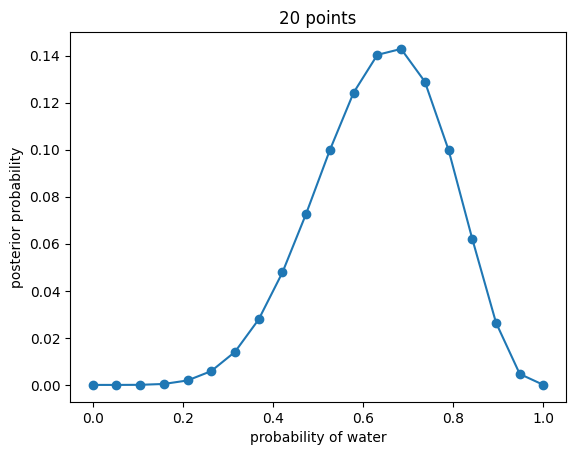

In [ ]:
# Code 2.3

# define p_grid
p_grid = jnp.linspace(start=0, stop=1, num=20)
print(f"p_grid: {p_grid}")

# define prior
prior = jnp.repeat(1, 20)
print(f"prior: {prior}")

# compute likelihood at each value in grid
likelihood = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6)) # this is like saying, what is the distribution -- likelihood given that we have 9 trials, and 6 of them were success (6 is the observed data)
                                                                             # this is calculated for EVERY probability in p_grid.. meaning what is the probability of seeing 6 success in 9 trials when the p is 0,
                                                                             # then calculates, what is the probability of seeing 6 success in 9 trials when the p is equal to 0.05, and so on until p is equal to 1.
print(f"likelihood: {likelihood}")

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# normalize unstd_posterior
std_posterior = unstd_posterior / jnp.sum(unstd_posterior)


# Code 2.4

plt.plot(p_grid, std_posterior, '-o')
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("20 points")
plt.show()